In [1]:
from pathlib import Path
import sys
import pandas as pd
import numpy as np
from IPython.display import display

OUTPUT_DIR = Path.cwd() / "output"       

OUTPUT_DIR.mkdir(exist_ok=True)


NA_VALUES = ["---", "--", "", " ", "NA", "N/A"]
# =========================
# FILE FINDER
# =========================
def find_file(name, start=Path.cwd()):
    for ancestor in [start] + list(start.parents):
        matches = list(ancestor.rglob(name))
        if matches:
            return matches[0]
    return None


def find_files(file_map):
    found = {}
    for key, filename in file_map.items():
        path = find_file(filename)
        if path:
            found[key] = path
        else:
            print(f"[WARNING] File not found: {filename}")
    return found

eda_script_path = find_file("script_eda.py")
if eda_script_path is None:
    raise FileNotFoundError("❌ script_eda.py tidak ditemukan di parent directory")

# tambahkan BASE PROJECT ke sys.path
sys.path.append(str(eda_script_path.parent))

# sekarang bisa import
from script_eda import evaluate_dataset, extract_column_schema,find_internal_duplicate_columns,extract_single_schema







================ Cuaca Harian DKI (Merged) ================



,tanggal,stasiun_id,ndvi
0,2009-12-19,DKI5,0.3801
1,2010-01-01,DKI5,0.3705
2,2010-01-17,DKI5,0.4848
3,2010-02-02,DKI5,0.5710
4,2010-02-18,DKI5,0.4308


📌 Columns:


,column,dtype
0,tanggal,object
1,stasiun_id,object
2,ndvi,float64


✅ Tidak ada data null
ℹ️ Kolom unik tidak ditentukan, skip cek duplikat


,count,mean,std,min,25%,50%,75%,max
ndvi,1810.000000,0.342735,0.142849,0.013800,0.229500,0.339250,0.464200,0.752100


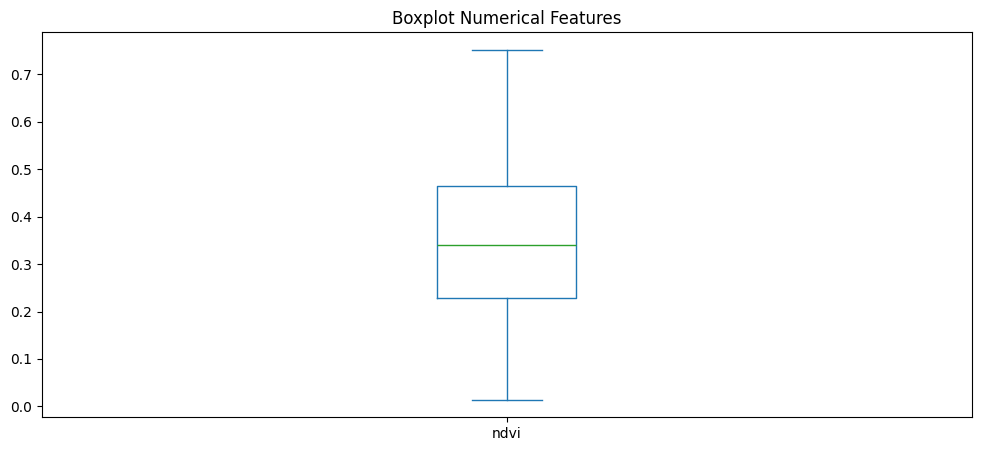

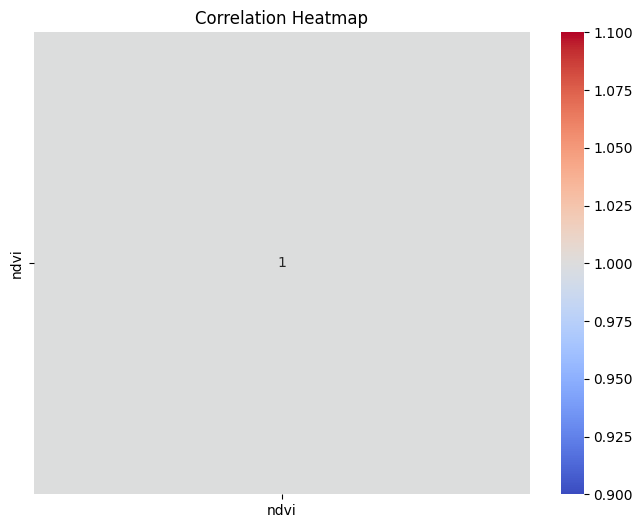

In [2]:
path_ndvi_data = find_file("indeks-ndvi-jakarta.csv")

if path_ndvi_data is None:
    raise FileNotFoundError("❌ File merged tidak ditemukan")

df_ndvi = pd.read_csv(path_ndvi_data, na_values=NA_VALUES)

evaluate_dataset(
    df_ndvi,
    name="Cuaca Harian DKI (Merged)",
)

In [3]:

output_path = OUTPUT_DIR / "indeks_ndvi_processed.csv"
df_ndvi.to_csv(output_path, index=False)